# Social Network Analysis - Amber Heard Case - Twitter

# Investigate Same Text
Adel Abu Hashim

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re
from ast import literal_eval as le

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import *

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import ast
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data_path = "../../twitter_data/"

In [3]:
# load commnets data with text processing
df_tweets_2022_prepared = pd.read_csv(data_path+"2022_prepared_tweets.csv")

In [4]:
df_tweets_2022_prepared.head()

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"['bringing', 'civil', 'case', 'amber', 'heard'...","['la77465262', 'Melinda15199317', 'Dior']",3,['JohnnyDepp'],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","['young', 'guy', 'varied', 'interests', 'socia..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"['thing', 'leave', 'alone', 'first', 'wonder',...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","['fuck', 'rules', 'favorite', 'k2', 'avril', '..."
2,1477499814719983617,2022-01-02 04:39:41+00:00,yeah but snyder isn't involved in the flash so...,"['yeah', 'snyder', 'involved', 'flash', 'would...","['soldierboy43001', 'ZakReckless']",2,[],0,1.427359e+18,StevenJCurry,2021-08-16 19:58:03+00:00,NaN,NaN
3,1477497740498292738,2022-01-02 04:31:26+00:00,you forgot he hook up with amber heard . i am ...,"['forgot', 'hook', 'amber', 'heard', 'sure', '...","['IIMissMax', 'bg98021', 'GerberKawasaki']",3,[],0,1.354477e+18,Vincent72516869,2021-01-27 17:11:08+00:00,NaN,NaN
4,1477496477484212225,2022-01-02 04:26:25+00:00,i never seen aquaman nor will i because amber ...,"['never', 'seen', 'aquaman', 'amber', 'heard']",[],0,[],0,1.076943e+18,YoonJaysSimp,2018-12-23 20:50:49+00:00,bl content * anime * manga * manhwa * nsfw * s...,"['bl', 'content', 'anime', 'manga', 'manhwa', ..."


In [5]:
df_tweets_2022_prepared["created_at"] = pd.to_datetime(df_tweets_2022_prepared["created_at"])
df_tweets_2022_prepared["user_created_at"] = pd.to_datetime(df_tweets_2022_prepared["user_created_at"])

In [6]:
data_investigation(df_tweets_2022_prepared)

Data Head


,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"['bringing', 'civil', 'case', 'amber', 'heard'...","['la77465262', 'Melinda15199317', 'Dior']",3,['JohnnyDepp'],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","['young', 'guy', 'varied', 'interests', 'socia..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"['thing', 'leave', 'alone', 'first', 'wonder',...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","['fuck', 'rules', 'favorite', 'k2', 'avril', '..."


______________________________________________________________________________

Data Shape


'The data has 573780 rows and 13 columns'

______________________________________________________________________________

Columns


['id',
 'created_at',
 'clean_text',
 'text_tokens',
 'mentions',
 'n_mentions',
 'hashtags',
 'n_hashtags',
 'user_id',
 'user_name',
 'user_created_at',
 'user_description',
 'user_description_tokens']

______________________________________________________________________________

Columns Must be Dropped (ALL NULLS)


None

______________________________________________________________________________

Columns Must be Dropped (HAS ONLY ONE UNIQUE VALUE)


None

______________________________________________________________________________

Column Data Type


id                                                              int
created_at                 pandas._libs.tslibs.timestamps.Timestamp
clean_text                                                      str
text_tokens                                                     str
mentions                                                        str
n_mentions                                                      int
hashtags                                                        str
n_hashtags                                                      int
user_id                                                       float
user_name                                                       str
user_created_at            pandas._libs.tslibs.timestamps.Timestamp
user_description                                                str
user_description_tokens                                         str
dtype: object

______________________________________________________________________________

Number of Nulls in Each Column


user_description           119082
user_description_tokens    119082
clean_text                  58134
text_tokens                 58134
user_id                     51528
user_name                   51528
user_created_at             51528
created_at                      2
id                              0
mentions                        0
n_mentions                      0
hashtags                        0
n_hashtags                      0
dtype: int64

______________________________________________________________________________

Percentge of Nulls in Each Column


user_description           0.207539
user_description_tokens    0.207539
clean_text                 0.101318
text_tokens                0.101318
user_id                    0.089804
user_name                  0.089804
user_created_at            0.089804
created_at                 0.000003
id                         0.000000
mentions                   0.000000
n_mentions                 0.000000
hashtags                   0.000000
n_hashtags                 0.000000
dtype: float64

______________________________________________________________________________

Numeric Columns' Staticts


,n_mentions,n_hashtags,user_id
count,573780.000000,573780.000000,5.222520e+05
mean,0.339529,1.035345,7.100235e+17
std,0.964897,1.588022,6.337171e+17
min,0.000000,0.000000,1.968000e+03
25%,0.000000,0.000000,4.470993e+08
50%,0.000000,0.000000,9.302652e+17
75%,0.000000,1.000000,1.325802e+18
max,50.000000,23.000000,1.519822e+18


______________________________________________________________________________



In [7]:
def fix_lists_columns(df, columns):
    def fix(r):
        if str(r) == "None" or str(r) == "nan":
            return r
        else:
            return le(r)
    for col in columns:
        df[col] = df[col].apply(lambda x: fix(x))

In [8]:
fix_lists_columns(
    df_tweets_2022_prepared,
    ["text_tokens", "user_description_tokens", "mentions", "hashtags",],
)

<a id='top'></a>
## Top repeated text





In [9]:
def hanlde_nan_and_null(x,fun,r):
    if str(x) == "None" or str(x) == "nan":
        return r
    else:
        return fun(x)

In [10]:
df_tweets_2022_prepared["text_tokens"] = df_tweets_2022_prepared["text_tokens"].apply(
    lambda x: hanlde_nan_and_null(x, set, {})
)

In [11]:
df_tweets_2022_prepared["text_tokens"] = df_tweets_2022_prepared["text_tokens"].apply(
    lambda x: set(x) - {"https"}
)

In [12]:
df_tweets_2022_prepared[
    df_tweets_2022_prepared["text_tokens"].apply(lambda x: len(x)) > 0
]["text_tokens"].shape

(502610,)

In [13]:
df_tweets_2022_prepared

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
0,1477504983130116096,2022-01-02 05:00:13+00:00,so why is only bringing a civil case against ...,"{time, johnny, uk, bringing, knows, stand, eve...","[la77465262, Melinda15199317, Dior]",3,[JohnnyDepp],1,1.149795e+08,seano999,2010-02-17 06:20:14+00:00,"young guy, varied interests. socialist. europe...","[young, guy, varied, interests, socialist, eur..."
1,1477503751716065280,2022-01-02 04:55:19+00:00,only thing i want them to leave alone is the f...,"{1, future, completely, need, thing, alone, fi...",[],0,[],0,1.426227e+18,WonderWilson18,2021-08-13 17:00:36+00:00,"so fuck your rules man your favorite k2, avril...","[fuck, rules, favorite, k2, avril, lavigne, wo..."
2,1477499814719983617,2022-01-02 04:39:41+00:00,yeah but snyder isn't involved in the flash so...,"{involved, snyder, yeah, heard, flash, would, ...","[soldierboy43001, ZakReckless]",2,[],0,1.427359e+18,StevenJCurry,2021-08-16 19:58:03+00:00,NaN,NaN
3,1477497740498292738,2022-01-02 04:31:26+00:00,you forgot he hook up with amber heard . i am ...,"{hook, sure, stress, find, someone, heard, for...","[IIMissMax, bg98021, GerberKawasaki]",3,[],0,1.354477e+18,Vincent72516869,2021-01-27 17:11:08+00:00,NaN,NaN
4,1477496477484212225,2022-01-02 04:26:25+00:00,i never seen aquaman nor will i because amber ...,"{seen, never, heard, aquaman, amber}",[],0,[],0,1.076943e+18,YoonJaysSimp,2018-12-23 20:50:49+00:00,bl content * anime * manga * manhwa * nsfw * s...,"[bl, content, anime, manga, manhwa, nsfw, simm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
573775,1515569901158600704,2022-04-17 05:56:37+00:00,gender card pulled out. they are now spinning ...,"{fact, johnny, spinning, woman, kawawa, manipu...",[],0,[],0,2.701354e+07,GhelSandra,2009-03-27 14:25:52+00:00,tomasino est 2000something art educator.person...,"[tomasino, 2000something, art, sayaka, akimoto..."
573776,1515569890391961601,2022-04-17 05:56:34+00:00,amber heard is a libra moon. ive known a few l...,"{get, people, emotionally, abusive, bitch, gui...",[],0,[],0,1.418420e+18,lilithrising_,2021-07-23 03:59:18+00:00,NaN,NaN
573777,1515569612686970883,2022-04-17 05:55:28+00:00,NaN,{},[],0,"[JusticeForJohnnyDepp, JusticeForJohnnyDeppVir...",2,3.303069e+09,CJMoss007,2015-08-01 07:03:17+00:00,#justiceforjohnnydepp,[justiceforjohnnydepp]
573778,1515569604818575368,2022-04-17 05:55:26+00:00,"amber heard is dating eve fartlow, chelsea man...","{shark, dating, like, feel, chelsea, illuminat...",[],0,[],0,1.319471e+18,Jankem69420,2020-10-23 02:50:36+00:00,''virtue-signalling geopolitically ignorant ca...,"[geopolitically, ignorant, cartoon, mouse, lam..."


In [14]:
import time
start_time = time.time()
values = df_tweets_2022_prepared[
    df_tweets_2022_prepared["text_tokens"].apply(lambda x: len(x)) > 0
]["text_tokens"].apply(tuple).value_counts()
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.2214081287384033 seconds ---


In [15]:
values = pd.DataFrame(values).reset_index().rename(columns={"index": "tokens", "text_tokens": "n_tweets"})

In [17]:
values

,tokens,n_tweets
0,"(hear, tape, reaction, johnny, getting, audio,...",51544
1,"(trial, interesado, kesa, tayo, naman, pagigin...",24965
2,"(johnny, depp)",3247
3,"(amber, heard)",2957
4,"(amber, fuck, heard)",2602
...,...,...
359767,"(czy, deppem, dluzsza, mnie, alright, ludzie, ...",1
359768,"(though, career, 10, amber, like, heard, matte...",1
359769,"(point, even, doubt, heard, case, cast, tweet,...",1
359770,"(tuned, stay, well)",1


### Values initil LOOK!

In [18]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][0])].clean_text.value_counts()

johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him                                                      51527
"johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him" https://t.co/tw3uqlmcbu                                1
johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him.\n https://t.co/8xvceu6tli                               1
johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him.                                                         1
johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him. https://t.co/b6rbztq7ma                                 1
johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing h

In [19]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][1])].clean_text.value_counts()

mas interesado pa ako sa johnng depp-amber heard trial kesa sa politics dito za pinas. andrama! after election balik din naman tayo sa pagiging law abiding citizen. just saying.    24965
Name: clean_text, dtype: int64

In [20]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][3])].clean_text.value_counts()

amber heard                            814
amber heard?                           128
amber heard.                            79
who is amber heard?                     22
amber heard what?                       19
                                      ... 
amber heard https://t.co/rfoa1dotik      1
who's "amber heard"                      1
against amber heard? nah                 1
amber heard has a cat?                   1
amber heard this                         1
Name: clean_text, Length: 1550, dtype: int64

In [21]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][4])].clean_text.value_counts()

fuck amber heard                            1625
fuck amber heard.                            245
fuck you amber heard                         118
fuck amber heard!                             64
and fuck amber heard                          41
                                            ... 
re up fuck amber heard                         1
so once again, fuck amber heard.               1
fuck amber heard https://t.co/ajji6niccv       1
fuck amber heard!!!!! that is all!             1
fuck amber heard...                            1
Name: clean_text, Length: 261, dtype: int64

In [22]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][5])].clean_text.value_counts()

dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ibqxgaollz via                          5
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/u13fwk01tj via                          3
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/8ufry4v5oh via                          2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/jskuhhkmz0 via                          2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/sznzup1qah via                          2
                                                                                                                             ..
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/zcrw1oz6lz via                          1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/4gd7w8hnz8 via    

In [23]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][6])].clean_text.value_counts()

good morning to everyone except amber heard                                                      211
good morning to everyone except amber heard.                                                      80
good morning to everyone, except amber heard                                                      10
good morning to everyone, except amber heard.                                                      9
good morning everyone except amber heard                                                           9
good morning to everyone except for amber heard                                                    8
good morning to everyone except for amber heard.                                                   6
good morning to everyone except amber heard!                                                       5
good morning everyone, except amber heard                                                          3
good morning everyone except amber heard.                                                  

In [24]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][8])].clean_text.value_counts()

dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/jsj5qax0f2 via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/7mcs8zjxlx via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/mtkrgk2vbn via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/jvudnhstf5 via    2
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/blenkk2mee via    1
                                                                                                        ..
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/k2n3trddge via    1
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/bayq56gn6r via    1
dc entertainment: remove amber heard from aquaman 2 - !firma la peticion! https://t.co/choeadep9d via    1
dc entertainment: remove amber heard 

In [25]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] ==  set(values["tokens"][10])].clean_text.value_counts()

all my homies hate amber heard                                        154
all the homies hate amber heard                                        19
all my homies hate amber heard.                                        13
me and all my homies hate amber heard                                  10
me and my homies hate amber heard                                       9
me and the homies hate amber heard                                      6
all my homies hate amber heard!!!                                       2
me & all my homies hate amber heard                                     2
me and my homies all hate amber heard                                   2
all my homies hate amber heard!                                         1
all my homies and i hate amber heard                                    1
me and my homies hate amber heard !                                     1
all my homies hate amber heard\nhttps://t.co/kqxvcbqrif                 1
all my homies hate amber heard. https:

In [26]:
values.head(1)

,tokens,n_tweets
0,"(hear, tape, reaction, johnny, getting, audio,...",51544


In [29]:
values.head(10)["tokens"][0]

('hear',
 'tape',
 'reaction',
 'johnny',
 'getting',
 'audio',
 'admits',
 'heard',
 'abusing',
 'finally',
 'amber',
 'depp',
 'court')

In [36]:
values["tokens"] = values["tokens"].apply(set)

In [39]:
values["tokens"] = values["tokens"].astype(str)

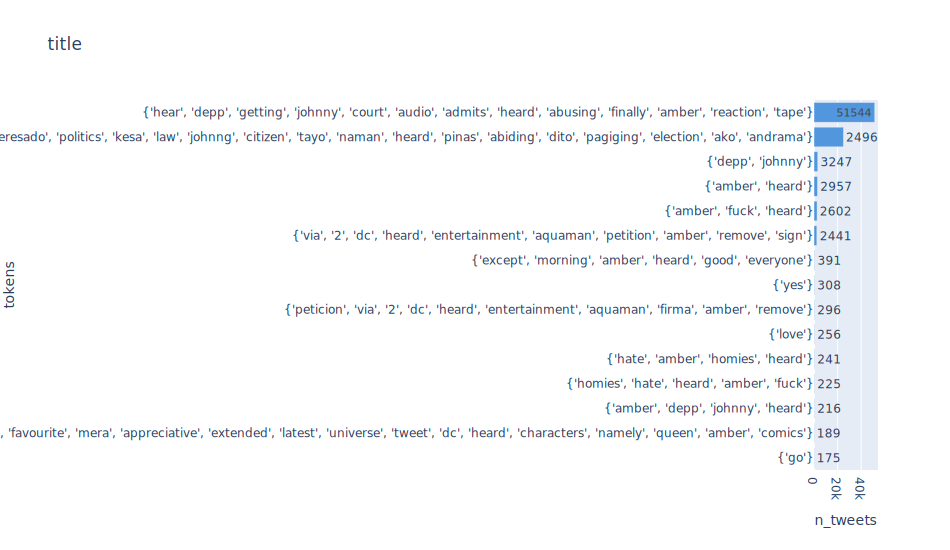

In [47]:
barh(values.head(15), "title", threshold=float("inf"), c=0)

In [48]:
values 

,tokens,n_tweets
0,"{'hear', 'depp', 'getting', 'johnny', 'court',...",51544
1,"{'saying', 'trial', 'interesado', 'politics', ...",24965
2,"{'depp', 'johnny'}",3247
3,"{'amber', 'heard'}",2957
4,"{'amber', 'fuck', 'heard'}",2602
...,...,...
359767,"{'dluzsza', 'ludzie', 'xd', 'sprawa', 'spojrze...",1
359768,"{'though', 'career', 'never', '10', 'like', 'h...",1
359769,"{'point', 'would', 'doubt', 'case', 'heard', '...",1
359770,"{'tuned', 'stay', 'well'}",1


<a id='11'></a>
### johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him
<ul>
<li><a href="#11">johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him</a></li>

</ul>


In [77]:
values

,tokens,n_tweets
0,"{'hear', 'depp', 'getting', 'johnny', 'court',...",51544
1,"{'saying', 'trial', 'interesado', 'politics', ...",24965
2,"{'depp', 'johnny'}",3247
3,"{'amber', 'heard'}",2957
4,"{'amber', 'fuck', 'heard'}",2602
...,...,...
359767,"{'dluzsza', 'ludzie', 'xd', 'sprawa', 'spojrze...",1
359768,"{'though', 'career', 'never', '10', 'like', 'h...",1
359769,"{'point', 'would', 'doubt', 'case', 'heard', '...",1
359770,"{'tuned', 'stay', 'well'}",1


In [80]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] == set(le(values["tokens"][0]))]

,id,created_at,clean_text,text_tokens,mentions,n_mentions,hashtags,n_hashtags,user_id,user_name,user_created_at,user_description,user_description_tokens
105296,1517523621752623105,2022-04-22 15:20:00+00:00,"""johnny depp's reaction to the court finally g...","{hear, tape, reaction, johnny, getting, audio,...",[],0,[],0,2.462270e+09,BreslerAlex,2014-04-24 21:37:22+00:00,information at another click.,"[information, another, click]"
141617,1517361879609487360,2022-04-22 04:37:17+00:00,johnny depp's reaction to the court finally ge...,"{hear, tape, reaction, johnny, getting, audio,...",[],0,[],0,1.309112e+18,iminfiniteless,2020-09-24 12:47:07+00:00,NaN,NaN
171629,1519192124528357376,2022-04-27 05:50:02+00:00,johnny depp's reaction to the court finally ge...,"{hear, tape, reaction, johnny, getting, audio,...",[],0,[JusticeForJohnnyDepp],1,8.585073e+17,thehamidhabibi,2017-04-30 02:24:30+00:00,watu`izu man tasha watudhilu man tasha,"[watu, izu, tasha, watudhilu, tasha]"
233668,1516846544363917312,2022-04-20 18:29:32+00:00,johnny depp's reaction to the court finally ge...,"{hear, tape, reaction, johnny, getting, audio,...",[],0,[JusticeforJohnnyDepp],1,2.339208e+08,johnnyhellodepp,2011-01-04 12:35:40+00:00,https://t.co/ksdhe44tll,[https]
464530,1517224838473175041,2022-04-21 19:32:44+00:00,johnny depp's reaction to the court finally ge...,"{hear, tape, reaction, johnny, getting, audio,...",[],0,"[JusticeForJohnnyDepp, JohnnyDeppIsInnocent, J...",4,1.050454e+18,ShehzadGul89,2018-10-11 18:31:22+00:00,journalist: #assignment editor at bol news tv\...,"[journalist, assignment, editor, bol, news, tv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
547018,1517166028832358400,2022-04-21 15:39:03+00:00,johnny depp's reaction to the court finally ge...,"{hear, tape, reaction, johnny, getting, audio,...",[],0,[],0,1.341194e+18,nfoshorts,2020-12-22 01:29:42+00:00,i post interesting stuff,"[post, interesting, stuff]"
547827,1517162420275347457,2022-04-21 15:24:43+00:00,johnny depp's reaction to the court finally ge...,"{hear, tape, reaction, johnny, getting, audio,...",[],0,[JusticeforJohnnyDepp],1,1.163297e+18,WOMENARENOTGOOD,2019-08-19 03:50:09+00:00,account dedicated to proving the fact that wom...,"[account, dedicated, proving, fact, women, goo..."
558007,1517179866587746309,2022-04-21 16:34:02+00:00,johnny depp's reaction to the court finally ge...,"{hear, tape, reaction, johnny, getting, audio,...",[],0,[],0,3.193065e+09,TopRedditPost,2015-04-22 01:25:17+00:00,NaN,NaN
558091,1517179550060453888,2022-04-21 16:32:47+00:00,johnny depp's reaction to the court finally ge...,"{hear, tape, reaction, johnny, getting, audio,...",[],0,[],0,7.479204e+08,YourNewBooks,2012-08-09 20:51:14+00:00,NaN,NaN


In [ ]:
df_tweets_2022_prepared[df_tweets_2022_prepared["text_tokens"] == set(le(values["tokens"][0]))]

In [89]:
class SameText:
    def __init__(self, df, token):
        self.token_df = df[df.text_tokens == set(le(token))]
        self.token = token

    def n_commnets_unique(self):
        print(
            f"This comment appeared in {self.token_df.clean_text.value_counts().shape[0]} shape"
        )

    def get_df(self):
        return self.token_df

    def users(self):
        return self.token_df.username.value_counts()

    def dates(self):
        return self.token_df.date.value_counts()

    def head(self, n):
        return self.token_df.head(n)

    def shapes(self, n):
        return self.token_df.clean_text.value_counts().head(n)

    def peak(self, n):
        bar_peaks(
            self.dates()
            .to_frame()
            .reset_index()
            .head(n)
            .rename(columns={"date": "n_comments"})
            .rename(columns={"index": "date"}),
            f"Peak Dates for {self.token}",
        )

    def date_info(self):
        min = self.dates().index.min()
        max = self.dates().index.max()
        print(f"The commentes were made between {min} and  {max}")
        print(
            self.token_df.groupby("year")
            .count()["message"]
            .to_frame()
            .rename(columns={"message": "n_comments"})
        )
        pie(
            self.token_df.groupby("year").count()["message"].to_frame().reset_index(),
            "Numner of Comments Per Year",
        )

        facet_heat(self.token_df, title='Numner of Comments Per Day')
        
        for year in self.token_df.year.unique():
            facet_days(self.token_df, str(int(year)))

    def users_dates(self, n):
        return (
            self.token_df.groupby(["username", "date"])
            .count()["message"]
            .sort_values(ascending=False)
            .head(n)
        )

    def df_timing(self):
        df = self.get_df()
        df["datetime"] = pd.to_datetime(df["datetime"])
        df = df.sort_values("datetime")
        df["diff"] = df.datetime.diff()
        return pd.concat([df, df["diff"].dt.components.iloc[:, 0:3]], axis=1)

    def get_groups(self, date):
        df = self.df_timing()
        return set(
            df[(df.days == 0) & (df.hours == 0) & (df.date.astype(str) == date)]
            .username.value_counts()
            .index
        )



In [90]:
jd = SameText(df_tweets_2022_prepared, values.tokens[0])

In [91]:
jd.n_commnets_unique()

This comment appeared in 18 shape


In [93]:
jd.shapes(18)

johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him                                                      51527
"johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him" https://t.co/tw3uqlmcbu                                1
johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him.\n https://t.co/8xvceu6tli                               1
johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him.                                                         1
johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing him. https://t.co/b6rbztq7ma                                 1
johnny depp's reaction to the court finally getting to hear the audio tape in which amber heard admits to abusing h

In [12]:
jd.dates()

2020-11-07    347
2020-11-13    243
2020-11-08    170
2020-12-18    169
2020-11-09    158
             ... 
2020-09-23      1
2020-05-05      1
2020-03-30      1
2021-06-19      1
2021-08-18      1
Name: date, Length: 489, dtype: int64

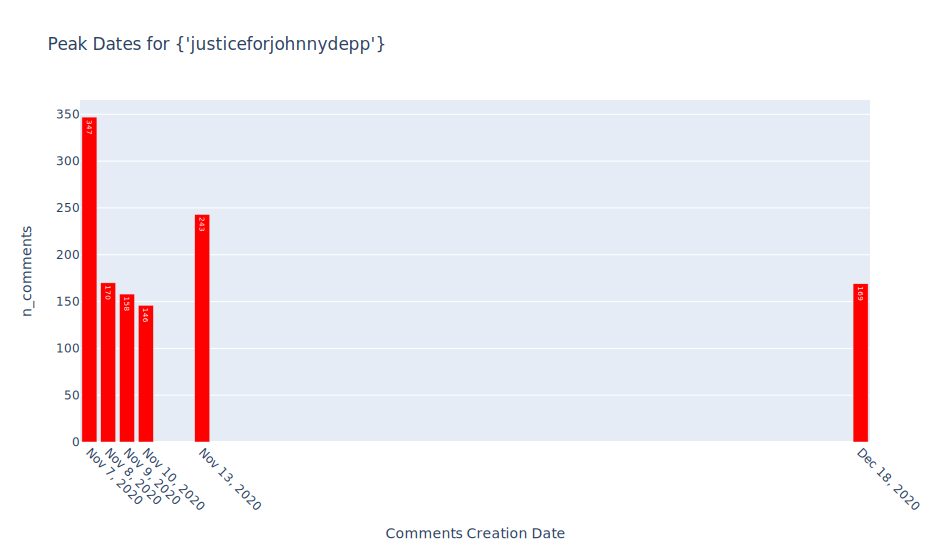

In [13]:
jd.peak(6)

The commentes were made between 2018-08-03 and  2021-08-19
      n_comments
year            
2018           2
2019           7
2020        4219
2021        1435


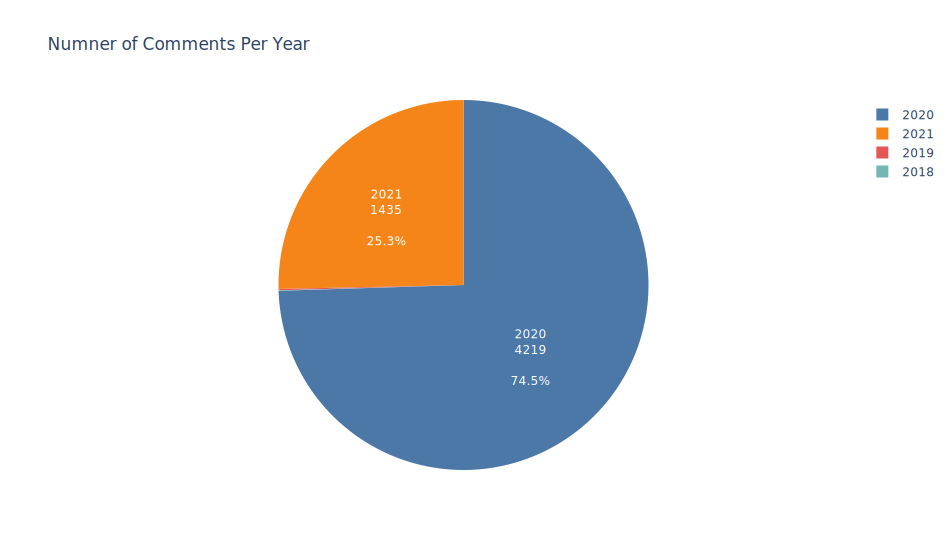

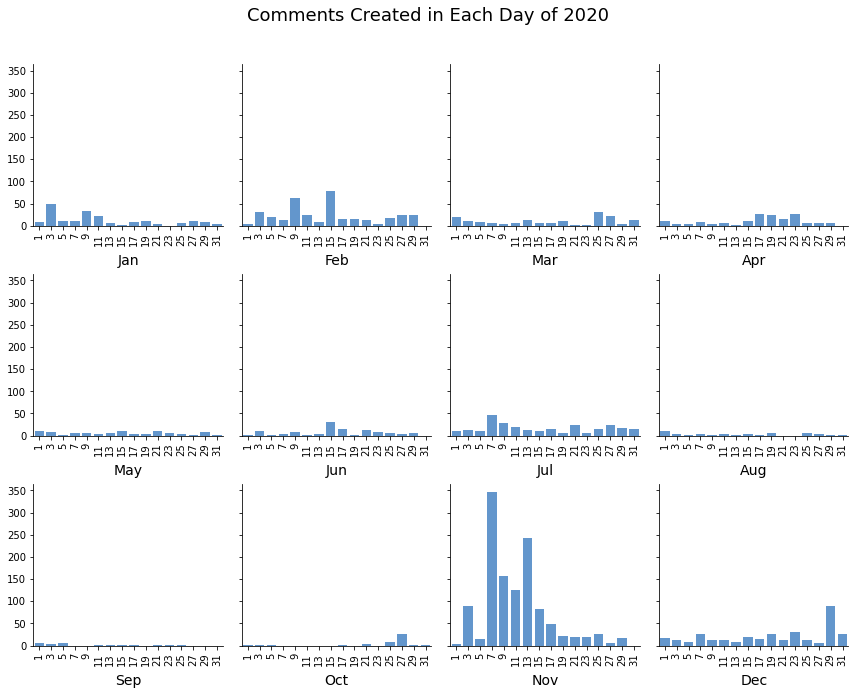

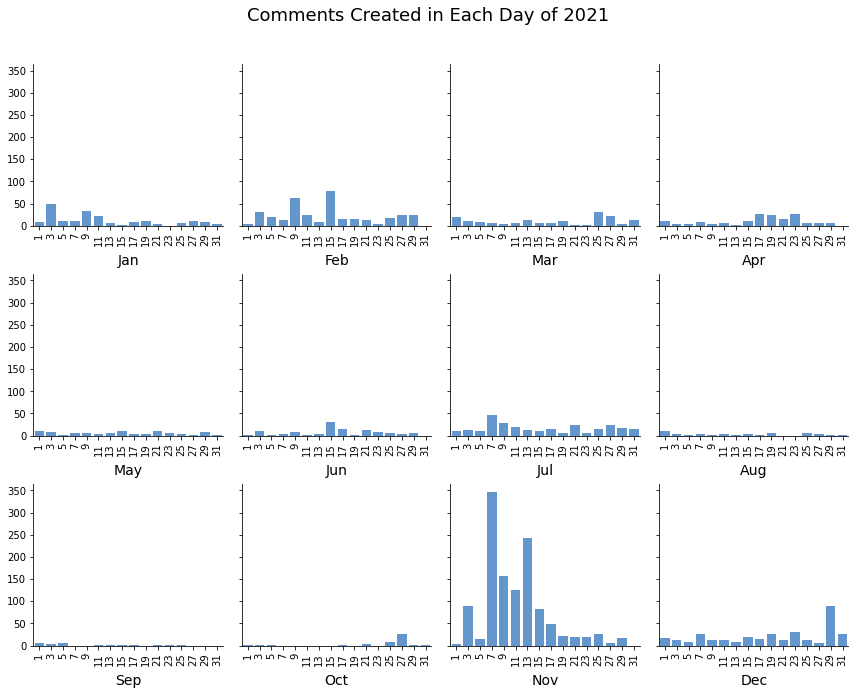

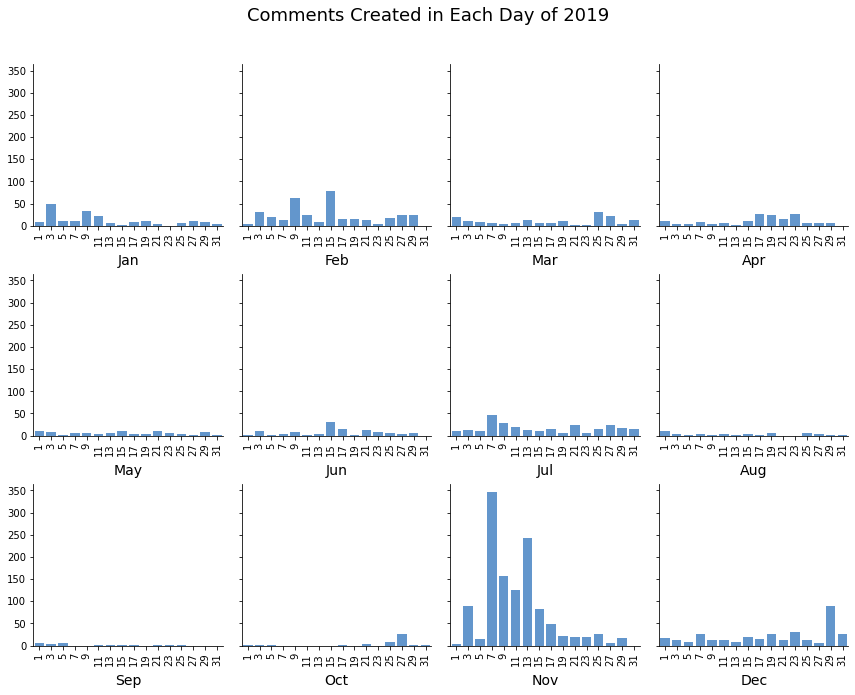

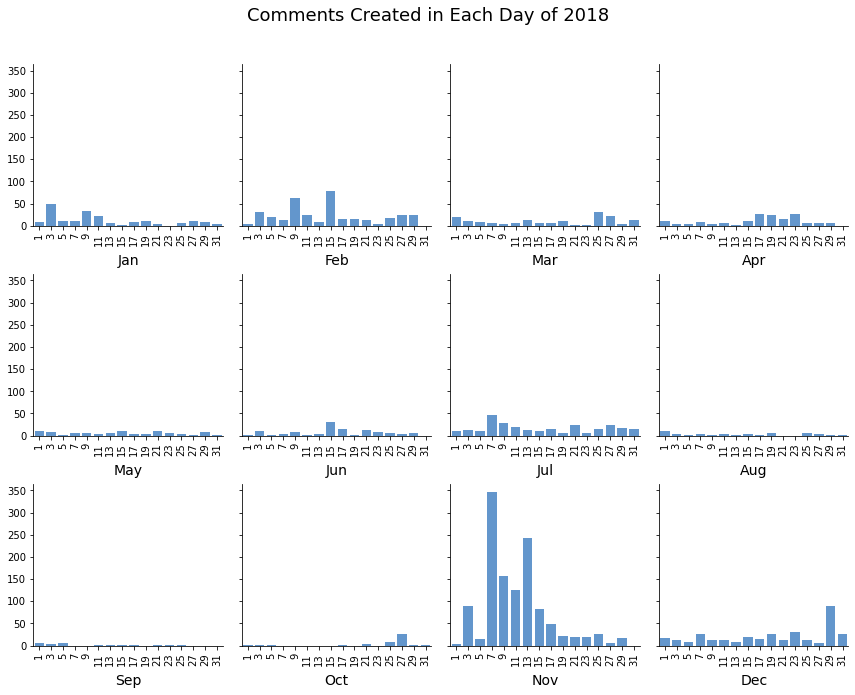

In [14]:
jd.date_info()

In [15]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,diff,days,hours,minutes
1191800,#justiceforjohnnydepp,2020-02-02 10:56:06,18127433167005480,0.0,0.0,2234618545040374528,n,4738883229,stellaefrancesca,False,...,Feb,2,2020-02-02,10,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:15,0.0,0.0,0.0
825184,#justiceforjohnnydepp,2020-02-02 18:29:03,17849590861870334,0.0,1.0,2235065878609621760,n,29125063230,smultronstallete,False,...,Feb,2,2020-02-02,18,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:08,0.0,0.0,0.0
825186,#justiceforjohnnydepp,2020-02-02 18:29:42,17891896801459536,0.0,1.0,2235065878609621760,n,29125063230,smultronstallete,False,...,Feb,2,2020-02-02,18,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:39,0.0,0.0,0.0
825206,#justiceforjohnnydepp,2020-02-02 21:05:43,17863123885660452,0.0,1.0,2235065878609621760,n,28267646684,octavia.area,False,...,Feb,2,2020-02-02,21,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:08,0.0,0.0,0.0
825207,#justiceforjohnnydepp 😢,2020-02-02 21:05:50,17870250130588944,0.0,1.0,2235065878609621760,n,28267646684,octavia.area,False,...,Feb,2,2020-02-02,21,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:07,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23143,#justiceforjohnnydepp,2021-07-05 20:52:44,17889843887320072,0.0,0.0,2607530456751659008,n,13267277793,just_jameilia,False,...,Jul,5,2021-07-05,20,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:21,0.0,0.0,0.0
279599,#justiceforjohnnydepp,2021-07-05 21:54:02,17967100564402456,0.0,1.0,2611245089148393472,n,3558856714,yecajess,False,...,Jul,5,2021-07-05,21,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:22,0.0,0.0,0.0
1232631,#justiceforjohnnydepp,2021-07-06 02:13:57,17916860146734348,0.0,0.0,2548520577264516608,n,11318725283,lilsands666,False,...,Jul,6,2021-07-06,2,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:17,0.0,0.0,0.0
439054,#justiceforjohnnydepp,2021-07-21 09:11:23,17913863992882964,0.0,1.0,2616101915660791808,n,38788829363,farhan.chow.98,False,...,Jul,21,2021-07-21,9,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:18,0.0,0.0,0.0


In [16]:
len(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

545

In [17]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

ownage130                   64
mathxy._01                  33
justicie.for.johnny.depp    30
netos.k                     30
becauseitsjohnnydepp        20
                            ..
briisa_0507                  1
aylar._.farhadi              1
talia.nehemia                1
iamflo01                     1
leorot7                      1
Name: username, Length: 545, dtype: int64

In [18]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-11-07    143
2020-11-13     81
2020-12-18     77
2021-02-15     65
2020-11-06     61
             ... 
2021-04-18      1
2021-07-01      1
2020-07-09      1
2021-06-03      1
2020-07-21      1
Name: date, Length: 168, dtype: int64

In [19]:
list(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['ownage130',
 'mathxy._01',
 'justicie.for.johnny.depp',
 'netos.k',
 'becauseitsjohnnydepp',
 'alexandr_while',
 'azulj.nolasco',
 'litsmryml',
 'cconnny',
 'olvorka',
 'johnnydepptime',
 'you.rine',
 'oh.no.c4rl',
 'ballikaya_defne_7',
 'johnny_depp_073',
 'johnnydepp._.fp',
 'bruises.0945',
 'camiferreira96',
 'violetgbb',
 'jdjazmin12',
 'machelyyyyy',
 'nadia_2030',
 'hani._cockatiel',
 'p.rctr',
 'yahaliza_2005',
 'mackenzilaplante',
 'johnny_1883_gg',
 'johnyiidep_fan',
 'felizxever',
 'karoline_cristina_karol',
 'themaurock_official',
 'elsiesfavv',
 'valentinaluna_12',
 'tmyzhra',
 'iheliwe',
 'oliverosyessi17',
 'oscurita.1313',
 'tom_hiddleston_ir',
 'cat.under.rock',
 '_shay_rae',
 'zgg_70',
 'murphy_eimhin',
 'angi9889',
 'julio_beltrann',
 'gellert1945',
 'chows_lucy_and_logan',
 'beyadeali_tazohour',
 'xsobhnx',
 'maryam_khaledi_77',
 'irrezzaa__',
 'mlegg_erms',
 'thisisxalina',
 'madineh7837',
 'claramaanda',
 'helenonia_silva',
 'zhra.006',
 'johnnyxhoneyy',
 'nachio